<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#airports_nearest,-parks_nearest,-ponds_nearest,-parks_around3000,-ponds_around3000" data-toc-modified-id="airports_nearest,-parks_nearest,-ponds_nearest,-parks_around3000,-ponds_around3000-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>airports_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000</a></span></li><li><span><a href="#balcony" data-toc-modified-id="balcony-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>balcony</a></span></li><li><span><a href="#last_price" data-toc-modified-id="last_price-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>last_price</a></span></li><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>is_apartment</a></span></li><li><span><a href="#first_day_exposition" data-toc-modified-id="first_day_exposition-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>first_day_exposition</a></span></li><li><span><a href="#locality_name,-cityCenter_nearest" data-toc-modified-id="locality_name,-cityCenter_nearest-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>locality_name, cityCenter_nearest</a></span></li><li><span><a href="#living_area,-kitchen_area,-total_area,-ceiling_height" data-toc-modified-id="living_area,-kitchen_area,-total_area,-ceiling_height-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>living_area, kitchen_area, total_area, ceiling_height</a></span></li><li><span><a href="#floors_total" data-toc-modified-id="floors_total-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>floors_total</a></span></li><li><span><a href="#days_exposition" data-toc-modified-id="days_exposition-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>days_exposition</a></span></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#открываем csv файл
try:
    data = pd.read_csv('C:/Users/sorial/Desktop/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
# выводим первые 20 строк таблицы для общего представления
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


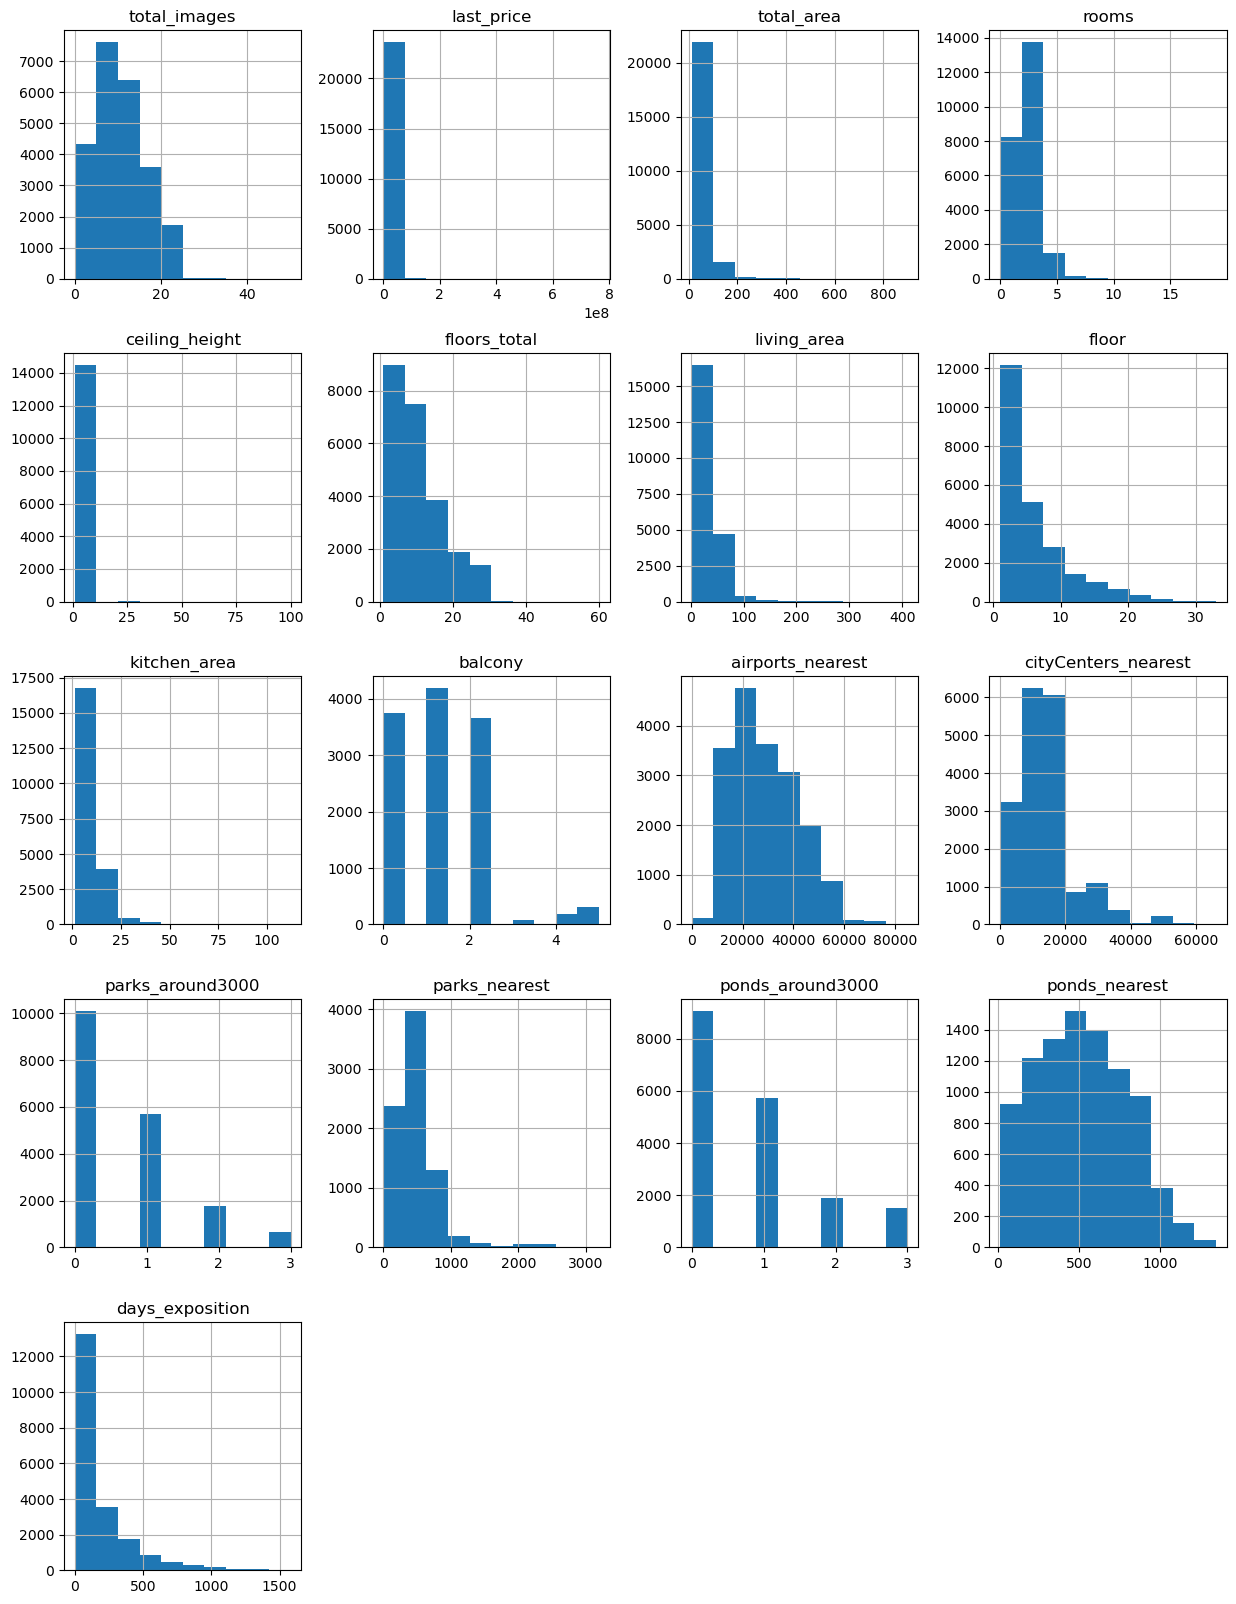

In [3]:
# выводим гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15,20))
plt.show()

In [4]:
#выводим общую информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# проверяем количество пропущенных значений по столбцам
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data.loc[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## Предобработка данных

### airports_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000

Можно начать со столбцов *airports_nearest*, *parks_nearest* и *ponds_nearest*. Так как, если не указано есть ли рядом аэропорты, парки или водоемы, то соответственно не будет и расстояния до них. Будем условно отмечать такие пропуски как **-1**. Так как мы заполнили пропуски, и в этих стобцах встречаются только целочисленные данные, то можем изменить их тип на *int*, чтобы в дальнейшем корректно анализировать их.

In [7]:
data['airports_nearest'] = \
data['airports_nearest'].fillna(-1).astype('int')
data['parks_nearest'] = \
data['parks_nearest'].fillna(-1).astype('int')
data['ponds_nearest'] = \
data['ponds_nearest'].fillna(-1).astype('int')

Т.к. *parks_around3000* и *ponds_around3000* это картографические данные, то можно предположить, что пропуск в них можно заменить на **0**, как отсутствие парка или пруда по близости. За одно можно изменить тип этих данных на целочисленный, т.к. количество парков / водоемов, не может являться вещественным.

In [8]:
data['parks_around3000'] = \
data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = \
data['ponds_around3000'].fillna(0).astype('int')

### balcony

Логично предположить, что если владелец не указал количество балконов (в столбце *balcony*), то стоит заменить пропущенные значения на **0**, т.е. будем считать что балкона в таких квартирах нет

In [9]:
data['balcony'] = data['balcony'].fillna(0)

### last_price

В *last_price* встречаются только целые значение, поэтому можно сразу изменить тип столбца на целочисленный.

In [10]:
data['last_price'] = data['last_price'].astype('int')

### is_apartment

Также можно предположить, что в столбце *is_apartment* пропуск означает, что это не апартаменты, следовательно, можно заменить их на значение **False**. Также следует изменить тип данных этого столбца на bool, т.к. он содержит только категориальные данные (это либо апартаменты, либо нет).

In [11]:
data['is_apartment'] = \
data['is_apartment'].fillna(False).astype('bool')

### first_day_exposition

Меняем тип данных в столбце *first_day_exposition*, т.к. он относится к datetime, чтобы с ним было проще работать в дальнейшем.

In [12]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

### locality_name, cityCenter_nearest

Проверим уникальные названия населенных пунктов:

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
# приводим названия населенных пунктов к общим правилам, 
# чтобы избежать повторов
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.replace(' городского типа ', ' ', regex=False)

In [15]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

Перед тем как работать со стобцом *cityCenters_nearest*, требуется удалить строки с пустым *locality_name*, т.к. их всего 49 штук и они не повлияют на подробный анализ.

In [16]:
data = data.dropna(subset=['locality_name'])
# проверям число оставшихся строк по колонке locality_name
data['locality_name'].count() 

23650

Рассмотрим столбец *cityCenters_nearest* и попробуем разобраться с чем связаны пропуски в этих данных.

In [17]:
# рассмотрим пропуски по деревням / селам / поселкам
data[(data["locality_name"].str.contains("деревня") |
     data["locality_name"].str.contains("поселок") |
     data["locality_name"].str.contains("село")) &
     data["cityCenters_nearest"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской поселок янино-1,-1,NaN,0,-1,0,-1,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,поселок мурино,-1,NaN,0,-1,0,-1,189.0
22,20,5000000,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня кудрово,-1,NaN,0,-1,0,-1,60.0
37,10,1990000,45.80,2017-10-28,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок красный бор,-1,NaN,0,-1,0,-1,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18.0,16.30,9,False,...,11.60,0.0,поселок мурино,-1,NaN,0,-1,0,-1,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,9,8150000,80.00,2016-04-17,3,NaN,17.0,44.90,12,False,...,11.40,0.0,деревня кудрово,-1,NaN,0,-1,0,-1,286.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок синявино,-1,NaN,0,-1,0,-1,45.0
23683,16,2100000,62.80,2018-09-18,4,2.50,5.0,45.50,3,False,...,5.50,0.0,поселок дзержинского,-1,NaN,0,-1,0,-1,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.70,1,False,...,NaN,0.0,село рождествено,-1,NaN,0,-1,0,-1,NaN


In [18]:
# рассмотрим пропуски cityCenters_nearest по Санкт-Петербургу
data[(data["locality_name"].str.contains("Санкт-Петербург") & data["cityCenters_nearest"].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Как мы видим пропусков *cityCenters_nearest* связаных с Петербургом всего 61, и практически все остальные пропуски связаны с деревнями / селами / поселками и другими населенными пунктами близ города. Из чего можно сделать вывод, что в таких населенных пунктах не имеет смысл смотреть на показатель расстояния до центра города, т.к. они и не являются городами, следовательно такие пропуски мы также можем заменить на условный маркер **-1**. Сразу приведем тип данных к целочисленному.

In [19]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1).astype('int')

### living_area, kitchen_area, total_area, ceiling_height

Рассмотрим случаи в которых полностью отсутствует информация о любых размерах квартиры. 

In [20]:
data[data['living_area'].isna() &
     data['kitchen_area'].isna() &
     data['total_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Значит у нас нет таких строк в которых информация о площади отсутствует вовсе. Рассмотрим другие случаи.

In [21]:
data[data['total_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Далее выполним группировку по комнатам и сформируем таблицу в которой будут находится коэфициенты с помощью которых можно будет заполнить пропуски параметров отдельно для каждой комнаты.

In [22]:
# группировка квартир по комнатам
data.groupby('rooms')['rooms'].count()

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [23]:
#находим медиану living_area по каждой rooms
rooms_living = data.groupby('rooms')['living_area'].median()

In [24]:
# в комнатах-студиях площадь кухни можно сразу заменить на 0,
# т.к. кухня там идет совместно
data.loc[
    data["rooms"] == 0,
    "kitchen_area"
] = 0
rooms_kitchen = data.groupby('rooms')['kitchen_area'].median()

In [25]:
# находим медиану total_area по каждой rooms
rooms_total = data.groupby('rooms')['total_area'].median()

In [26]:
# находим медиану ceiling_height по каждой rooms
rooms_ceiling = data.groupby('rooms')['ceiling_height'].median()

Рассмотрим высоту потолков. В данных встречаются аномальные значения высоты, будем считать, что в квартирах где высота указана от 20 м до 50 м владелец забыл поставить запятую как разделитель, соответственно будем делить такие значения на 10, а остальные аномальные значения заменим на медианное значение по количеству комнат.

In [27]:
data.loc[(20 <= data['ceiling_height']) &
         (data['ceiling_height']<= 50), 'ceiling_height'] = \
data.loc[(20 <= data['ceiling_height']) &
         (data['ceiling_height']<= 50), 'ceiling_height'] / 10

Объединяем полученные медианы в одну таблицу:

In [28]:
median_areas = pd.merge(rooms_living, rooms_total, on = 'rooms')
median_areas = pd.merge(median_areas, rooms_kitchen, on = 'rooms')
median_areas = pd.merge(median_areas, rooms_ceiling, on = 'rooms')
median_areas

,living_area,total_area,kitchen_area,ceiling_height
rooms,,,,
0,18.000,26.05,0.00,2.750
1,17.600,36.53,9.01,2.640
2,30.500,53.00,8.80,2.600
3,45.000,72.90,9.50,2.650
4,63.800,99.50,11.05,2.800
5,91.785,146.45,15.10,3.100
6,123.900,184.30,19.50,3.200
7,145.000,214.00,20.00,3.380
8,161.000,235.70,25.00,3.420


Добавляем два новых столбца kitchen_ratio, living_ratio, которые показывают долю площади кухни и жилой площади в общей площади квартиры для каждой группы. Пропуски ceiling_height логично будет заполнить медианой по комнатам, т.к. высота потолков не зависит от общей площади и других параметров.

In [29]:
median_areas['kitchen_ratio'] = median_areas['kitchen_area'] / median_areas['total_area']
median_areas['living_ratio'] = median_areas['living_area'] / median_areas['total_area']
median_areas

,living_area,total_area,kitchen_area,ceiling_height,kitchen_ratio,living_ratio
rooms,,,,,,
0,18.000,26.05,0.00,2.750,0.000000,0.690979
1,17.600,36.53,9.01,2.640,0.246647,0.481796
2,30.500,53.00,8.80,2.600,0.166038,0.575472
3,45.000,72.90,9.50,2.650,0.130316,0.617284
4,63.800,99.50,11.05,2.800,0.111055,0.641206
5,91.785,146.45,15.10,3.100,0.103107,0.626733
6,123.900,184.30,19.50,3.200,0.105806,0.672273
7,145.000,214.00,20.00,3.380,0.093458,0.677570
8,161.000,235.70,25.00,3.420,0.106067,0.683072


Т.к. в таблице всего одна квартира с 19 комнатами и в ней не указана высота потолка, можем взять медиану значения 16 комнат, чтобы не оставлять значение пустым.

In [30]:
median_areas.loc[median_areas.index == 19, 
                 'ceiling_height'] = 3.000


In [31]:
# создадим цикл в котором для каждой квартиры в зависимости от
# количества комнат заполним пропуски kitchen_area, living_area
# и ceiling_height
for room_amount in data['rooms'].unique():
    data.loc[
         (data['rooms'] == room_amount) &
         (data['kitchen_area'].isna()),
         'kitchen_area'
    ] = median_areas.loc[
        room_amount, 'kitchen_ratio'
    ] * data.loc[
         (data['rooms'] == room_amount) &
         (data['kitchen_area'].isna()),
         'total_area'
    ]
    data.loc[
         (data['rooms'] == room_amount) &
         (data['living_area'].isna()),
         'living_area'
    ] = median_areas.loc[
        room_amount, 'living_ratio'
    ] * data.loc[
         (data['rooms'] == room_amount) &
         (data['living_area'].isna()),
         'total_area'
    ]
    data.loc[
         (data['rooms'] == room_amount) &
         ((data['ceiling_height'].isna()) | 
          (data['ceiling_height'] > 50)),
         'ceiling_height'
    ] = median_areas.loc[room_amount, 'ceiling_height']

In [32]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              85
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

### floors_total

Для начала можно рассмотреть случаи, где количество этажей в доме не указано, при этом этаж квартиры является 1. Можно рассмотреть такие квартиры как отдельные 1-этажные дома и заполнить такие пропуски.

In [33]:
data.loc[(data["floors_total"].isna()) &
     (data["floor"] == 1), 'floors_total'] = 1
data['floors_total'].isna().sum()

82

Осталось всего 82 пропуска, и так как *floors_total* не зависит от других данных, можно опустить такие строки, чтобы они не помешали анализу. Также можно изменить тип данных на целочисленный.

In [34]:
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

### days_exposition

Поскольку мы не можем узнать сколько дней было размещено объявление (от публикации до снятия), то и пропуски заполнить можно только условно. Будем заполнять такие пропуски **0**. Затем изменим тип этого столбца на целочисленный, т.к. это количество дней.

In [35]:
data['days_exposition'] = \
data['days_exposition'].fillna(0).astype('int')

In [36]:
data.groupby(data['first_day_exposition'].dt.year)['days_exposition'].count()

first_day_exposition
2014     136
2015    1167
2016    2746
2017    8162
2018    8486
2019    2871
Name: days_exposition, dtype: int64

In [37]:
data.query('days_exposition == 0').groupby(data['first_day_exposition'].dt.year)['days_exposition'].count()

first_day_exposition
2014      18
2015      70
2016      67
2017     271
2018     957
2019    1788
Name: days_exposition, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23568 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23568 non-null  int64         
 1   last_price            23568 non-null  int32         
 2   total_area            23568 non-null  float64       
 3   first_day_exposition  23568 non-null  datetime64[ns]
 4   rooms                 23568 non-null  int64         
 5   ceiling_height        23568 non-null  float64       
 6   floors_total          23568 non-null  int32         
 7   living_area           23568 non-null  float64       
 8   floor                 23568 non-null  int64         
 9   is_apartment          23568 non-null  bool          
 10  studio                23568 non-null  bool          
 11  open_plan             23568 non-null  bool          
 12  kitchen_area          23568 non-null  float64       
 13  balcony         

**Итоги предобработки**: все пропуски заполнены, там где пропуски заполнить было невозможно эти строки были убраны, т.к. их количество было несущественно. Аномальные данные по возможности были убраны. Тип данных некоторых столбцов изменен для последующего анализа.

In [39]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23568.000000,2.356800e+04,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000,23568.000000
mean,9.877419,6.539573e+06,60.320516,2.070604,2.696637,10.674644,34.635509,5.877503,10.405277,0.593601,22048.199932,10881.317804,0.468771,166.489435,0.589868,198.112144,156.429947
std,5.681512,1.091033e+07,35.656313,1.078584,0.254401,6.595307,22.768366,4.871486,5.856990,0.960622,16463.463925,9640.981013,0.748374,306.647896,0.883930,305.585350,213.510178
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,10146.000000,2203.250000,0.000000,-1.000000,0.000000,-1.000000,22.000000
50%,9.000000,4.645000e+06,52.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,21855.000000,11246.500000,0.000000,-1.000000,0.000000,-1.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.780000,1.000000,34324.000000,15242.250000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,427.546729,33.000000,121.868081,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Начнем со столбца *total_images*. Больше или равное 30 фотографий квартиры выглядит как аномалия, такие значения можем разделить на 10, округлить и вернуть тип столбца обратно на целочисленный.

In [40]:
data.loc[data['total_images'] >= 30, 'total_images'] = \
round(data.loc[data['total_images'] >= 30, 'total_images'] / 10)
data['total_images'] = data['total_images'].astype('int')

Проверим аномальные цены на квартиры в столбце *last_price* (больше 300 млн, либо меньше 100 тыс руб).

In [41]:
data.query('last_price >= 300000000 or last_price <= 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.000000,0.0,санкт-петербург,23011,1197,3,519,3,285,233
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.500000,0.0,санкт-петербург,36421,9176,1,805,0,-1,8
12971,19,763000000,400.0,2017-09-30,7,3.38,10,250.0,10,False,...,37.383178,2.0,санкт-петербург,25108,3956,1,530,3,756,33
14706,15,401300000,401.0,2016-02-20,5,3.10,9,204.0,9,False,...,24.000000,3.0,санкт-петербург,21912,2389,1,545,1,478,393
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.000000,0.0,санкт-петербург,32440,5297,0,-1,2,198,111
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.000000,0.0,санкт-петербург,30706,7877,0,-1,2,318,106


В квартире стоимостью 12190 скорее всего стоимость указывали в миллионах, поэтому можем домножить это значение на 1000. Стоимость остальных квартир может оказаться реальной, учитывая их общую площадь и близость к центру города.

In [42]:
data.loc[data['last_price'] <= 100000, 'last_price'] *= 1000

По столбцам *total_area* и *rooms*. Общая площадь в одной квартире достигает 900 квадратных метров, учитывая её стоимость и кол-во комнат (420 млн и 12 комнат) такое действительно может быть, поэтому оставим эту строчку как есть. Минимальное количество комнат указанное в данных это *0*, что также не является аномалией, т.к. скорее всего это комнаты студии, и мы можем добавить значение *studio* равное **True** если там указано *rooms* = 0.

In [43]:
data.loc[(data['rooms'] == 0) & (data['studio'] != True), 'studio'] = True
data.query('studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,2.75,24,15.500000,2,False,...,0.0,2.0,поселок мурино,-1,-1,0,-1,0,-1,181
349,4,2320000,25.00,2017-09-27,0,2.75,14,17.000000,1,False,...,0.0,0.0,деревня кудрово,-1,-1,0,-1,0,-1,45
440,8,2480000,27.11,2018-03-12,0,2.75,17,24.750000,4,False,...,0.0,2.0,санкт-петербург,38171,15015,0,-1,2,982,64
508,0,3375000,34.40,2017-03-28,0,2.75,26,24.300000,19,False,...,0.0,1.0,поселок парголово,53115,19292,0,-1,1,593,430
608,2,1850000,25.00,2019-02-20,0,2.75,10,17.274472,7,False,...,0.0,0.0,поселок шушары,-1,-1,0,-1,0,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.75,25,18.000000,16,False,...,0.0,0.0,санкт-петербург,11405,13222,0,-1,1,623,14
23442,0,2500000,27.70,2017-09-28,0,2.75,24,18.000000,4,False,...,0.0,2.0,поселок мурино,-1,-1,0,-1,0,-1,4
23554,15,3350000,26.00,2018-09-07,0,2.75,19,17.965451,8,False,...,0.0,0.0,санкт-петербург,18090,17092,0,-1,2,112,31
23592,10,1450000,29.00,2017-11-11,0,2.75,9,18.000000,8,False,...,0.0,2.0,никольское,-1,-1,0,-1,0,-1,82


Таким образом получили 205 комнат-студий. Далее рассмотрим столбец *ceiling_height*, минимум у которого является 1 м, что является аномально низким. Проверим все квартиры в которых потолок меньше или равный 1.8 м, за одно проверим значения больше 8 м. В них заменим высоту потолка на медиану по таблице.

In [44]:
data.query('ceiling_height <= 1.8 or ceiling_height >= 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,7.300000,0.0,деревня нурма,-1,-1,0,-1,0,-1,125
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.200000,0.0,городской поселок мга,-1,-1,0,-1,0,-1,248
5863,20,5650000,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,8.300000,1.0,санкт-петербург,13069,10763,0,-1,1,613,14
15061,19,5600000,56.4,2018-05-11,2,14.00,14,32.4,5,False,...,9.100000,2.0,санкт-петербург,14814,13610,0,-1,0,-1,315
15743,14,5600000,67.0,2016-11-11,3,8.00,16,41.0,1,False,...,8.000000,0.0,санкт-петербург,32691,11035,1,723,0,-1,474
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.340000,0.0,санкт-петербург,18732,20444,0,-1,3,80,71
17442,0,5350000,54.0,2015-06-16,2,8.00,5,29.0,2,False,...,8.966038,1.0,красное село,24638,28062,0,-1,0,-1,469
22309,20,5300000,45.0,2017-09-30,1,10.30,16,15.5,15,False,...,11.099097,0.0,санкт-петербург,36353,11936,2,440,2,450,136
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.000000,0.0,санкт-петербург,33053,14217,2,293,2,289,13


In [45]:
data.loc[(data['ceiling_height'] <= 1.8) | (data['ceiling_height'] >= 8), 'ceiling_height'] = data['ceiling_height'].median()

Аномально низкие значения в столбцах *living_area* и *kitchen_area* также не будем менять, т.к. это могут быть квартиры студии и их площадь может быть просто включена в общую площадь *total_area*.

### Посчитайте и добавьте в таблицу новые столбцы

Создадим отдельную таблицу *good_data* и уже туда добавим новые столбцы на которые будем ссылаться для анализа. Начнем с добавления столбца цены одного квадратного метра.

In [46]:
good_data = data

In [47]:
# создаём функцию price_per_meter для 
# рассчета цены за квадратный метр
def price_per_meter(data):
    try:
        price = data['last_price'] / data['total_area']
        return price
    except: 
        return 'Error'

In [48]:
good_data['price_per_meter'] = \
good_data.apply(price_per_meter, axis = 1)

Добавим столбец *weekday*, который будет указывать день недели публикации объявления (0 - понедельник, 1 - вторник, и так далее).

In [49]:
# используем встроенный метод dayofweek для типа данных datetime
good_data['weekday'] = good_data['first_day_exposition'].dt.dayofweek

Добавим столбец *month* для месяца публикации объявления.

In [50]:
# используем встроенный метод month для типа данных datetime
good_data['month'] = good_data['first_day_exposition'].dt.month

Таким же образом добавим столбец *year* для года публикации объявления.

In [51]:
# используем встроенный метод year для типа данных datetime
good_data['year'] = good_data['first_day_exposition'].dt.year

Теперь добавим столбец *floor_type* с типом этажа квартиры ("первый", "последний" или "другой").

In [52]:
def floor_type(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'другой'

In [53]:
good_data['floor_type'] = \
good_data.apply(floor_type, axis = 1)

In [54]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482,2,755,0,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.600000,1,False,...,0,-1,0,-1,81,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.300000,4,False,...,1,90,2,574,558,92785.714286,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,98.148148,9,False,...,2,84,3,234,424,408176.100629,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112,1,48,121,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.64,12,14.400000,5,False,...,0,-1,0,-1,55,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.600000,6,False,...,0,-1,0,-1,155,99195.710456,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.60,24,41.203774,22,False,...,0,-1,0,-1,0,110544.692737,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.64,27,15.430000,26,False,...,0,-1,0,-1,189,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0,-1,0,-1,289,88524.590164,6,2,2017,другой


In [55]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23568 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23568 non-null  int32         
 1   last_price            23568 non-null  int32         
 2   total_area            23568 non-null  float64       
 3   first_day_exposition  23568 non-null  datetime64[ns]
 4   rooms                 23568 non-null  int64         
 5   ceiling_height        23568 non-null  float64       
 6   floors_total          23568 non-null  int32         
 7   living_area           23568 non-null  float64       
 8   floor                 23568 non-null  int64         
 9   is_apartment          23568 non-null  bool          
 10  studio                23568 non-null  bool          
 11  open_plan             23568 non-null  bool          
 12  kitchen_area          23568 non-null  float64       
 13  balcony         

Добавим новый столбец *cityCenters_nearest_km* в котором будет  округленное расстояние до центра города в км. Исключим значения помеченные *-1*, которые не имеют информации.

In [56]:
good_data['cityCenters_nearest_km'] = round(data.loc[data['cityCenters_nearest'] != -1, 'cityCenters_nearest'] / 1000)

In [57]:
good_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482,2,755,0,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.600000,1,False,...,-1,0,-1,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.300000,4,False,...,90,2,574,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,98.148148,9,False,...,84,3,234,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112,1,48,121,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.64,12,14.400000,5,False,...,-1,0,-1,55,95065.789474,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.600000,6,False,...,-1,0,-1,155,99195.710456,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.60,24,41.203774,22,False,...,-1,0,-1,0,110544.692737,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.64,27,15.430000,26,False,...,-1,0,-1,189,87454.764777,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,-1,0,-1,289,88524.590164,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

Исследуем общие параметры объектов и опишем их методом *describe*.

In [58]:
good_data.query(
    'cityCenters_nearest != -1 and airports_nearest != -1 and parks_nearest != -1 and ponds_nearest != -1'
).describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,cityCenters_nearest_km
count,4784.000000,4.784000e+03,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,...,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4.784000e+03,4784.000000,4784.000000,4784.000000,4784.000000
mean,10.204222,1.017831e+07,72.288656,2.333403,2.786085,9.213629,41.954011,5.185410,11.863426,0.505226,...,1.452759,507.383779,1.715719,486.103470,173.682274,1.246324e+05,2.551003,6.402592,2017.297032,12.351171
std,5.808201,1.889330e+07,46.048769,1.216413,0.313618,5.382304,29.392712,4.015247,7.360482,0.929219,...,0.686375,394.074733,0.837818,274.339381,235.304479,7.831193e+04,1.771706,3.476471,1.085987,9.913888
min,0.000000,1.600000e+06,12.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,13.000000,0.000000,1.739130e+04,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,4.450000e+06,44.000000,1.000000,2.600000,5.000000,21.500000,2.000000,7.649011,0.000000,...,1.000000,284.000000,1.000000,263.000000,21.000000,9.126488e+04,1.000000,3.000000,2017.000000,6.000000
50%,10.000000,6.300000e+06,60.000000,2.000000,2.650000,8.000000,34.700472,4.000000,10.000000,0.000000,...,1.000000,441.000000,1.000000,457.000000,85.000000,1.069138e+05,2.000000,6.000000,2017.000000,11.000000
75%,15.000000,1.002175e+07,85.000000,3.000000,2.950000,12.000000,50.225000,7.000000,13.600000,1.000000,...,2.000000,613.250000,2.000000,698.000000,224.250000,1.343506e+05,4.000000,10.000000,2018.000000,15.000000
max,28.000000,7.630000e+08,517.000000,14.000000,6.000000,60.000000,332.000000,26.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1572.000000,1.907500e+06,6.000000,12.000000,2019.000000,59.000000


Выводим гистограмму по каждому параметру из задания.

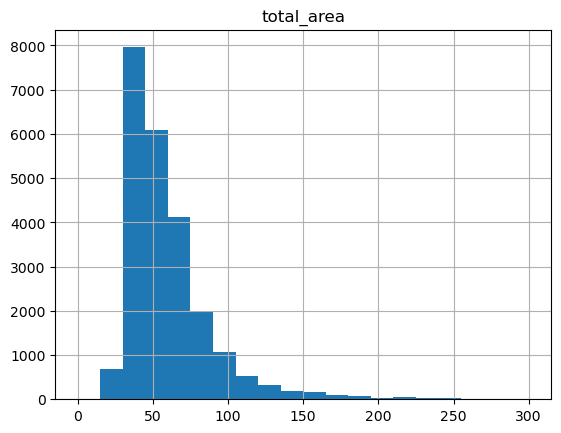

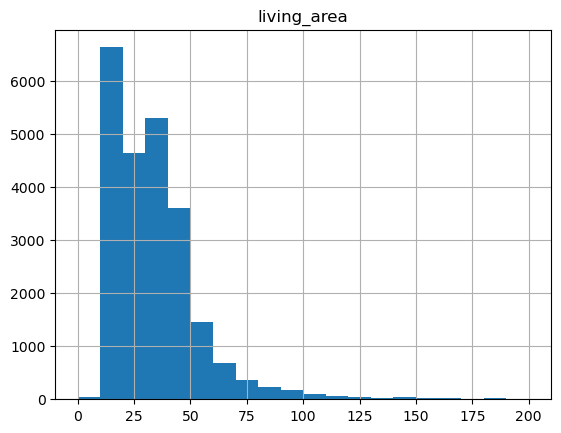

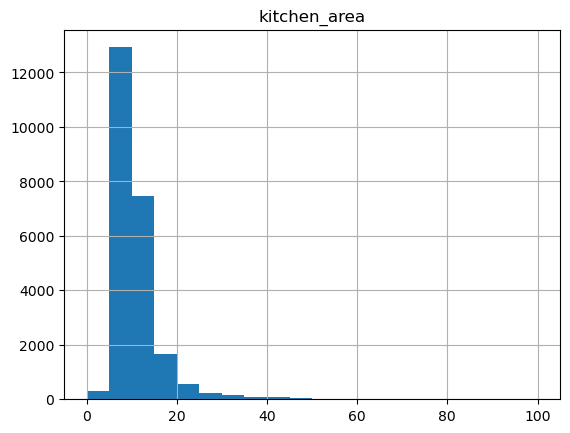

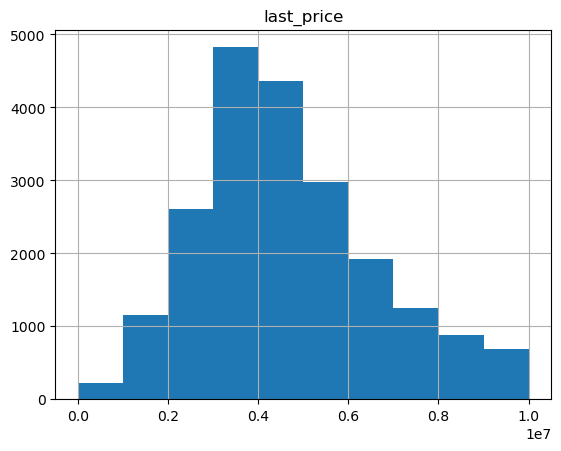

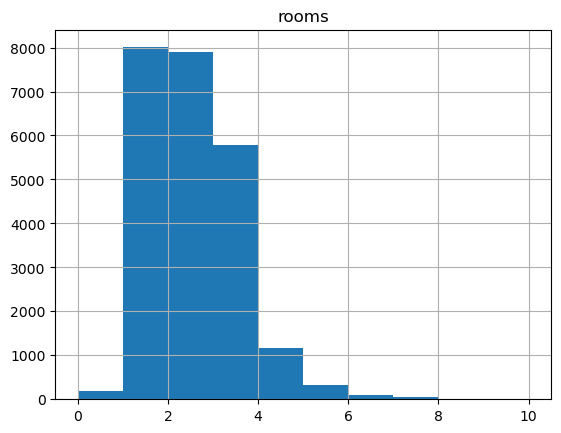

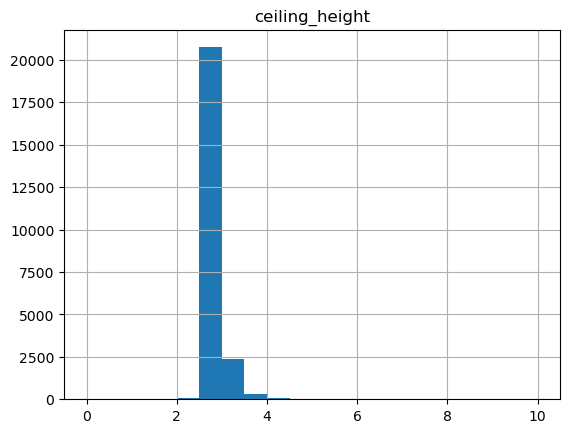

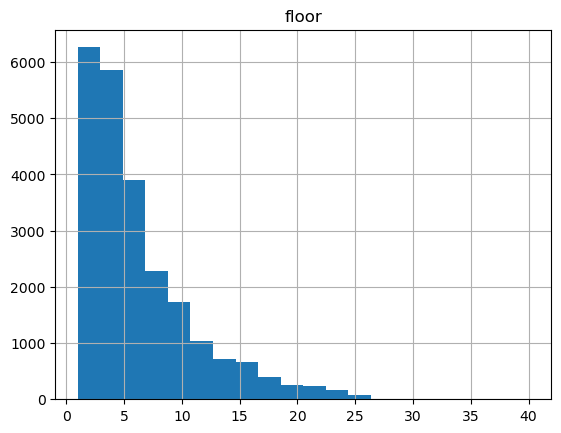

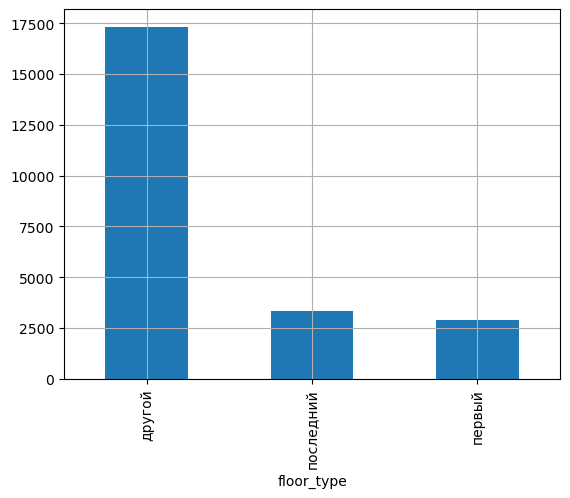

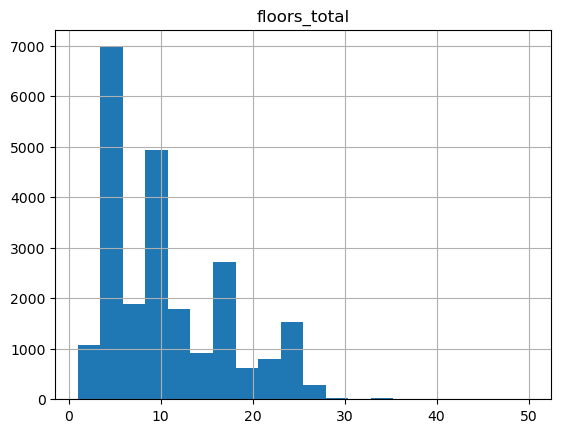

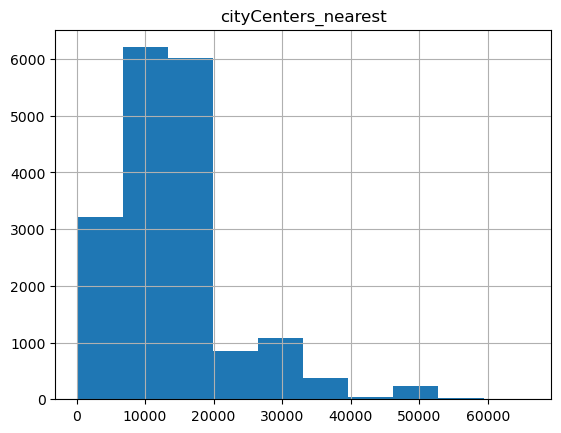

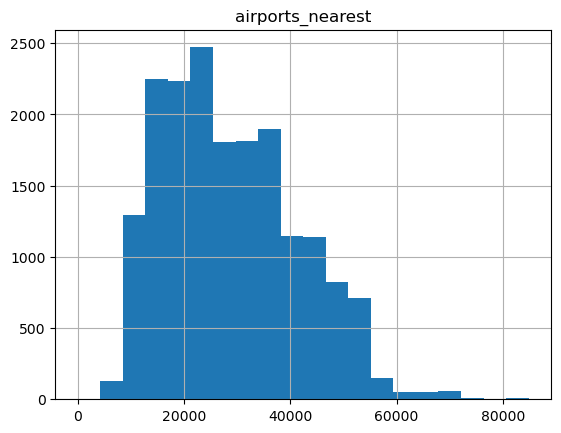

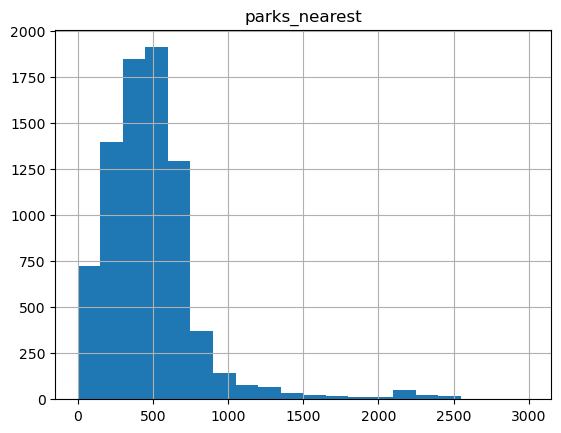

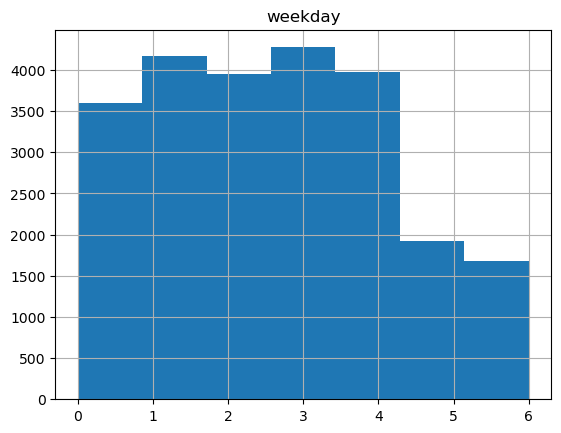

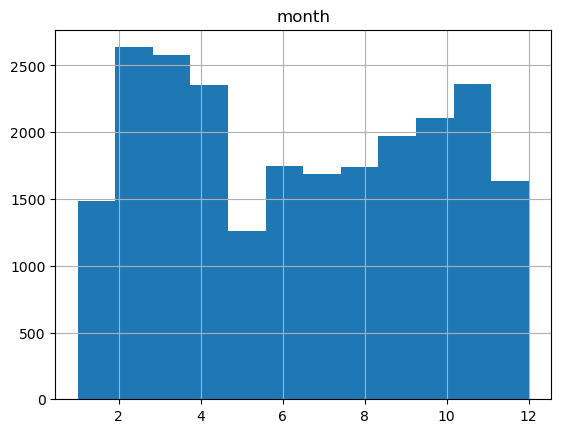

In [59]:
good_data.hist('total_area', range=(0, 300), bins=20)
plt.show()
good_data.hist('living_area', range=(0,200), bins=20)
plt.show()
good_data.hist('kitchen_area', range=(0,100), bins=20)
plt.show()
good_data.hist('last_price', range=(0, 10000000), bins=10)
plt.show()
good_data.hist('rooms', range=(0,10), bins=10)
plt.show()
good_data.hist('ceiling_height', range=(0,10), bins=20)
plt.show()
good_data.hist('floor', range=(1,40), bins=20)
plt.show()
good_data.groupby('floor_type')['floor_type'].count().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.show()
good_data.hist('floors_total', range=(1,50), bins=20)
plt.show()
good_data.query('cityCenters_nearest != -1').hist('cityCenters_nearest')
plt.show()
good_data.query('airports_nearest != -1').hist('airports_nearest', bins=20)
plt.show()
good_data.query('parks_nearest != -1').hist('parks_nearest', range = (0,3000), bins=20)
plt.show()
good_data.hist('weekday', range=(0,6), bins=7)
plt.show()
good_data.hist('month', range=(1,12), bins=12)
plt.show()

**Вывод по каждой гистограмме**: 
- общая площадь в основном находится в промежутке *от 25 м до 75 м*;
- жилая площадиь в большинстве квартир *от 10 м до 50 м*;
- площадь кухни по большей части в промежутке *от 0 м до 20 м*, т.к. в данных есть комнаты-студии;
- стоимость большинства квартир находится в промежутке *от 2 млн до 6 млн* руб;
- количество комнат по большей части находится в промежутке *от 1 до 3*;
- высота полков в превосходящем числе квартир составляет *2,5 - 3 м*;
- большинство квартир находится на этаже *от 1 до 6*;
- как и ожидалось у большинства квартир тип этажа является *"другой"*;
- в большинстве домов *до 10 этажей*;
- большинство квартир отдалены от центра города в промежутке *от 8 до 20 км*;
- для большинства квартир ближайший аэропорт находится в промежутке *от 15 до 38 км*;
- для большинства квартир ближайший парк находится в промежутке *от 200 до 600 м*;
- чаще всего объявления выкладываются в рабочие дни *(от 0 до 4)*;
- чаще всего объявления выкладываются *с конца зимы по середину весны*, летом идёт небольшой спад и *к началу осени* объявлений появляется больше, как и *на протяжении всей осени* до самого декабря

**Как быстро продавались квартиры (days_exposition)**

Рассмотрим столбец *days_exposition*, не будем брать во внимание значения равные *0*, т.к. ими мы заполнили пропуски по которым не было данных.

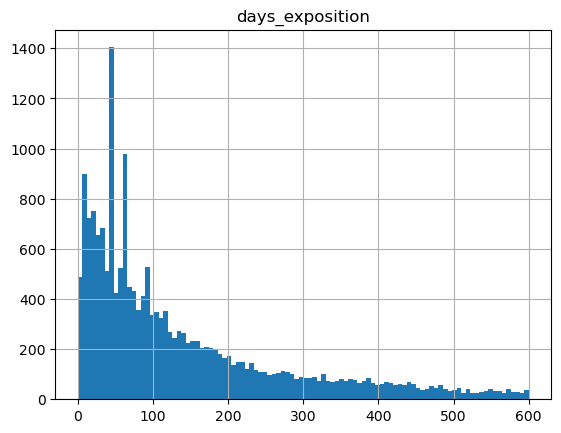

In [60]:
good_data.query('days_exposition != 0').hist('days_exposition', range=(0, 600), bins=100)
plt.show()

In [61]:
good_data.query('days_exposition != 0')['days_exposition'].describe()

count    20397.000000
mean       180.749179
std        219.722833
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [62]:
print(good_data.query('days_exposition != 0')['days_exposition'].mean())
print(good_data.query('days_exposition != 0')['days_exposition'].median())

180.74917880080403
95.0


Из полученных результатов можно сделать вывод, что **в среднем продажа занимает 95 дней** (по медиане), если рассматривать по квартилям, нормальным считается продать квартиру в промежуток от 45 до 231 дня, т.е. можно сказать что квартиры проданные *меньше чем за 45 дней* можно считать **быстрыми** продажами, а *дольше 231 дня* **необычно долгими** продажами.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Для того чтобы вывести матрицу рассеивания для нужных факторов, создадим отдельную сводную таблицу со всеми нужными параметрами.

              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.482470     0.462339    0.626302
last_price        0.482470    1.000000     0.586240    0.653684
living_area       0.462339    0.586240     1.000000    0.946973
total_area        0.626302    0.653684     0.946973    1.000000


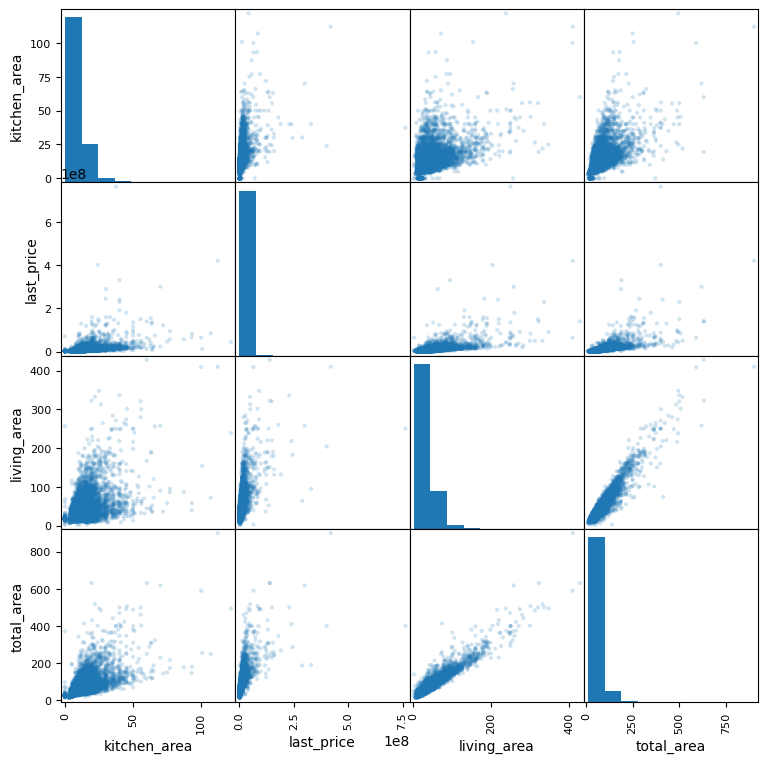

In [63]:
price_factors = \
(good_data
    .pivot_table(index = good_data.index, values = ['living_area', 'kitchen_area', 
                                                    'last_price', 'total_area'])
)
print(price_factors.corr())
pd.plotting.scatter_matrix(price_factors, grid=True, alpha = 0.2, figsize=(9,9))
plt.show()

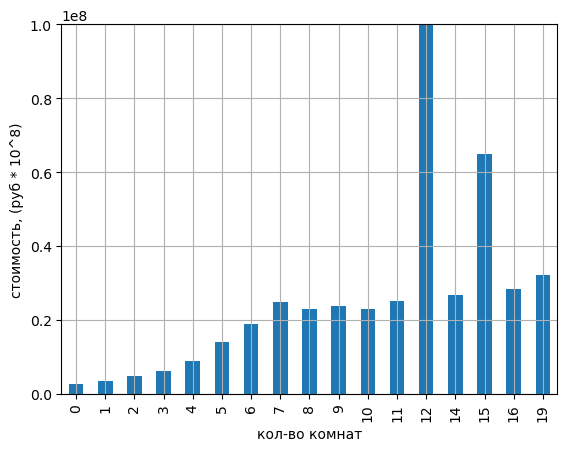

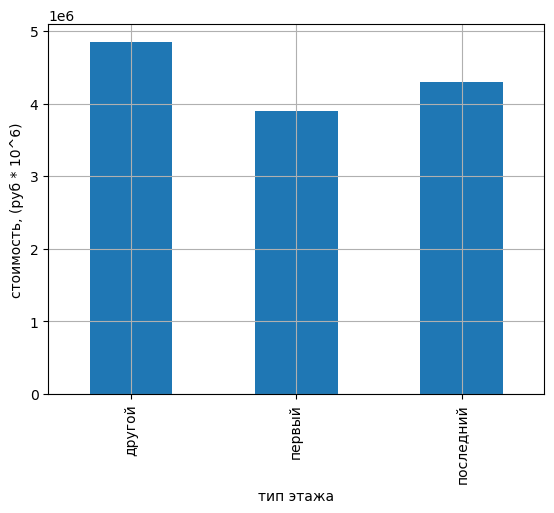

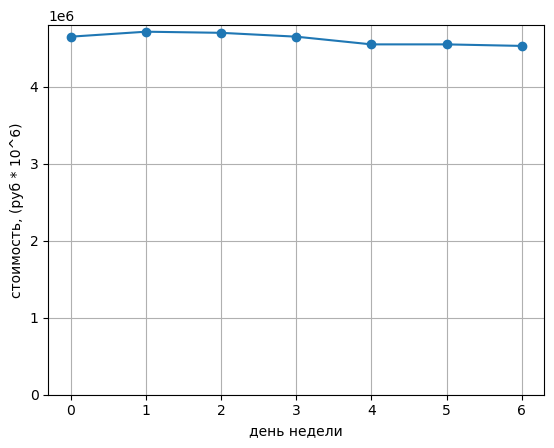

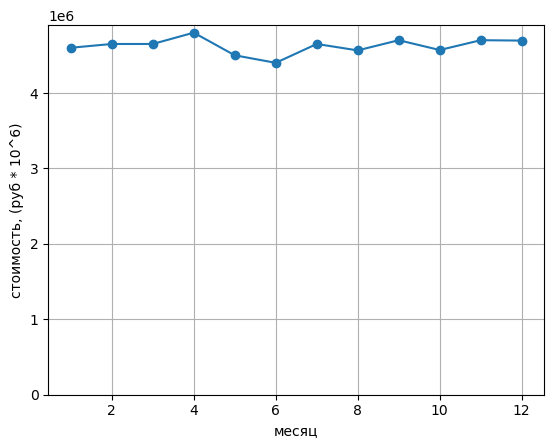

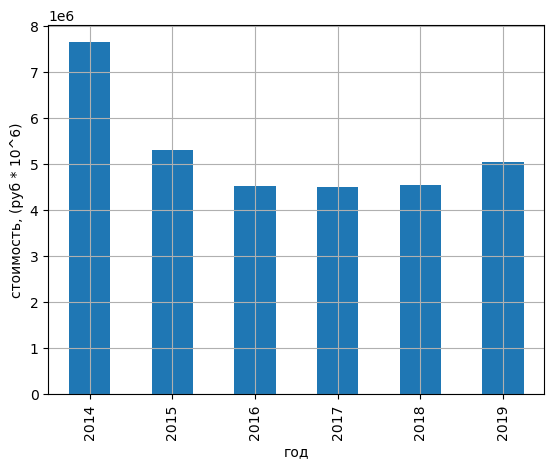

In [64]:
good_data.groupby('rooms')['last_price'].median().plot(kind = 'bar', style = 'o-', 
                                                       grid = True, xlabel = 'кол-во комнат', 
                                                       ylabel = 'стоимость, (руб * 10^8)' , ylim = (0,100000000))
plt.show()
good_data.groupby('floor_type')['last_price'].median().plot(kind = 'bar', style = 'o-', 
                                                            grid = True, xlabel = 'тип этажа', 
                                                            ylabel = 'стоимость, (руб * 10^6)')
plt.show()
good_data.groupby('weekday')['last_price'].median().plot(style = 'o-', grid = True, 
                                                         xlabel = 'день недели', 
                                                         ylabel = 'стоимость, (руб * 10^6)', ylim = (0, 4800000))
plt.show()
good_data.groupby('month')['last_price'].median().plot(style = 'o-', grid = True, 
                                                       xlabel = 'месяц', 
                                                       ylabel = 'стоимость, (руб * 10^6)', ylim = (0, 4900000))
plt.show()
good_data.groupby('year')['last_price'].median().plot(kind = 'bar', style = 'o-', 
                                                      grid = True, xlabel = 'год', 
                                                      ylabel = 'стоимость, (руб * 10^6)')
plt.show()

**Вывод**: цена квартиры как и ожидалось *больше всего зависит* от общей площади, далее жилой площади, площади кухни и количества комнат, при этом она практически не зависит от месяца и дня недели выставления объявления, а также *имеет минимальную обратную зависимость* с годом объявления(т.е. с каждым годом цена на квартиры немного увеличивается).

**Дополнение к выводу**: 
- по комнатам видна зависимость, что чем больше комнат тем выше цена, единственный выброс находится на 12-комнатной квартире, т.к. там самая дорогая квартира из-за большой общей площади и близости к центру города;
- больше всего стоимость у квартир с типом этажа "другой", т.к. таких квартир куда больше типов "первый" и "последний" этажи;
- стоимость квартиры была выше всего когда объявления выкладывались с понедельника по четверг включительно, с пятницы по воскресенье же цены были немного ниже;
- с февраля по апрель включительно (1 - 4 месяца) наблюдается более высокая стоимость квартир, далее идёт снижение в мае-июне  включительно (5 - 6 месяцы) и в следующие месяца цена держится примерно одинаковой;
- квартиры в 2014 году стоили гораздо дороже, потом шло снижение стоимости до 2018 года включительно и в 2019 году стоимость начала немного повышаться.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [65]:
(good_data
    .groupby('locality_name')['price_per_meter']
    .agg(['count','mean'])
    .sort_values(by='count', ascending=False)
).head(10)

,count,mean
locality_name,,
санкт-петербург,15652,114874.219591
поселок мурино,552,85629.568678
поселок шушары,439,78551.344545
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
поселок парголово,327,90175.913458
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


**Вывод**: В Санкт-Петербурге самая большая стоимость квадратного метра и она составляет 114867 руб, далее идет Мурино и Шушары (85629 и 78551 руб соотвественно), и на 10-м месте находится Выборг с его стоимостью за квадратный метр 58141 руб.

**Средняя цена каждого километра до центра города в Санкт-Петербурге**

In [66]:
city = 'санкт-петербург'
(good_data
    .query('locality_name == @city')
    .groupby('cityCenters_nearest_km')['last_price']
    .agg(['count','mean'])
    .sort_values(by='mean', ascending=False)
).head(10)

,count,mean
cityCenters_nearest_km,,
0.0,27,3.144912e+07
1.0,192,2.120672e+07
2.0,310,1.778832e+07
6.0,618,1.533842e+07
7.0,420,1.477515e+07
5.0,915,1.445600e+07
4.0,688,1.330428e+07
3.0,348,1.113739e+07
8.0,594,9.949111e+06


**Вывод**: исходя из получившейся таблицы, можно увидить зависимость, что чем ближе квартира к центру города, тем значительно выше стоимость недвижимости. При этом можно заметить, что 3-й, 4-й и 5-й км от центра находятся не по порядку стоимости, но это возможно из-за разницы в самих квартирах, тем не менее тенденция стоимости квартир в зависимости от близости к центру прослеживается.

## Общий вывод

Мы провели большое исследование по данным квартир из объявлений в Санкт-Петербурге и населенных пунктов близ него. 
Получились очень важные итоги:
- стоимость квартиры больше всего зависит от общей площади, жилой площади, площади кухни и количества комнат;
- также немаловажным фактором является близость квартиры к центру города, соответственно чем ближе квартира к центру тем намного выше её стоимость;
- с каждым годом цены на квартиры немного повышались;
- в Санкт-Петербурге получилась самая большая стоимость за квадратный метр, далее идут Мурино и Шушары;
- в среднем продажа квартиры занимает 95 дней, быстрая продажа считается сроком до 45 дней и необычно долгая сроком дольше 231 дня.